In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn import metrics

import seaborn as sns

def get_x(df):
    return df.loc[:, df.columns != 'class']
    
def get_y(df):
    return df.loc[:, ['class']].T.values[0]

def get_probs_positive_class(pred):
        positive_probs = []

        for prediction in pred:
            positive_probs.append(prediction[1])
        return positive_probs
    

def load_dataframes(train_path, test_path):
    train_df = pd.read_csv(train_path, index_col=0)
    test_df = pd.read_csv(test_path, index_col=0)
    return train_df, test_df


def cross_testing_accuracy(train_df, test_df, genes_ranking_path, thresholds):
    gdf = pd.read_csv(genes_ranking_path, index_col=0)
    genes = list(gdf.index)
    
    for threshold in thresholds:
        print("Cross-testing with threshold:", threshold)
        #clf = SVC(gamma='auto', probability=True)
        clf = GBC()
        
        tr_top = train_df.loc[:, genes[0:threshold]+['class']]
        ts_top = test_df.loc[:, genes[0:threshold]+['class']]

        X_train = get_x(tr_top)
        y_train = get_y(tr_top)

        clf.fit(X_train, y_train)


        X_test = get_x(ts_top)
        y_test = get_y(ts_top)

        acc_score = clf.score(X_test, y_test)

        pred = clf.predict_proba(X_test)
        y_pred = np.argmax(pred, axis=1)
        pred = get_probs_positive_class(pred)

        roc_auc = metrics.roc_auc_score(np.array(y_test, dtype=int), pred)
        pred_accuracy = metrics.accuracy_score(y_test, y_pred)

        print("Accuracy with .score:", acc_score)
        print("Accuracy with .predict_proba:", pred_accuracy)
        print("ROC AUC:", roc_auc)
        print("Predictions:", y_pred)
        print("\n")

In [2]:
ths = [1, 5, 10, 15, 20, 50, 100]

genes_rank = "/home/colombelli/Documents/experiments/Experiments22_ago/luad/hyb_borda_borda/selection/agg_ranking_th1.csv"
train_df_path = "/home/colombelli/Documents/datasets/assembler/luad/intersect.csv"

test_df1_path = "/home/colombelli/Documents/datasets/cumida/lung/GSE18842/intersect.csv"
test_df2_path = "/home/colombelli/Documents/datasets/cumida/lung/GSE19804/intersect.csv"
test_df3_path = "/home/colombelli/Documents/datasets/cumida/lung/GSE27262/intersect.csv"

In [21]:
tr_df, ts_df = load_dataframes(train_df_path, test_df1_path)
ts_df2, ts_df3 = load_dataframes(test_df2_path, test_df3_path)

In [4]:
import seaborn as sns

In [22]:
tr_df = tr_df.sample(frac=1)
df0 = tr_df.iloc[0:20, 0:-1].T
df0

,TCGA-62-A46Y-01A-11R-A24H-07,TCGA-86-6562-01A-11R-1755-07,TCGA-97-A4LX-01A-11R-A24X-07,TCGA-44-2665-11A-01R-1758-07,TCGA-38-4628-01A-01R-1206-07,TCGA-78-7150-01A-21R-2039-07,TCGA-05-5715-01A-01R-1628-07,TCGA-55-8301-01A-11R-2287-07,TCGA-05-4384-01A-01R-1755-07,TCGA-J2-8194-01A-11R-2241-07,TCGA-78-8655-01A-11R-2403-07,TCGA-62-A472-01A-11R-A24H-07,TCGA-44-6147-01A-11R-1755-07,TCGA-78-7148-01A-11R-2039-07,TCGA-38-4632-11A-01R-1755-07,TCGA-44-7660-01A-11R-2066-07,TCGA-55-7727-01A-11R-2170-07,TCGA-62-A46U-01A-11R-A24H-07,TCGA-49-6744-11A-01R-1858-07,TCGA-05-4433-01A-22R-1858-07
HOTAIR,0.128423,2.273136,-1.669273,-1.669273,2.024741,2.823806,5.092897,1.421263,0.241737,0.714129,-1.669273,-1.669273,3.022303,0.833313,-1.669273,0.386799,1.742554,-1.669273,-1.669273,1.170567
C9orf43,2.662723,-0.921325,-0.324483,-1.312025,-4.347894,-2.273136,-4.404890,-0.107860,2.701821,-0.035942,-0.855203,-1.300063,2.289496,-0.954655,-0.607341,1.112869,1.044493,1.033184,-1.824457,-1.044493
INSC,-3.662115,-1.980633,-0.746441,2.372999,-1.170567,-0.221101,2.721650,1.072874,0.628593,-0.757243,-1.636491,0.965807,-0.334852,-3.662115,1.217231,-3.662115,-0.138708,-3.662115,2.130515,2.761894
CYP11B1,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852,4.816311,-0.334852,3.595391,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852
TGFA,0.639237,3.440043,1.264374,-2.208757,2.273136,1.980633,2.099866,0.056484,-0.855203,-0.757243,0.334852,1.372352,-0.046213,0.365999,-0.965807,-1.689097,-0.800610,1.995258,-1.838320,2.305967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASAP2,-1.662691,-2.662723,-1.495798,0.617961,-3.298276,5.325413,-1.810656,-1.649566,-1.089977,-1.336051,-3.882110,-3.117771,-0.210789,0.988176,-0.554422,2.802955,-3.410699,-1.264374,1.623466,5.464198
WDTC1,0.324483,0.221101,2.549581,3.142447,-0.314120,-4.240942,-0.910256,2.802955,2.161528,-2.009960,-3.805080,-2.322550,0.586138,-1.433586,-0.056484,-3.192856,-1.112869,-1.623466,1.101410,3.469926
NOTCH2,-0.397210,6.909418,0.345228,-0.407629,0.046213,-0.087305,1.078569,0.087305,0.714129,-0.293412,2.240739,0.800610,1.508364,-1.597563,-0.480794,1.995258,3.117771,-0.512287,1.158972,3.093429
MPP5,-0.714129,3.325681,1.240741,-0.231417,4.992955,-0.283067,1.372352,-1.205521,0.438933,-0.159287,-2.224697,2.909497,2.477288,1.715716,0.768060,-1.182189,1.135867,-1.866239,3.298276,2.643445


[Text(0.5, 0, '')]

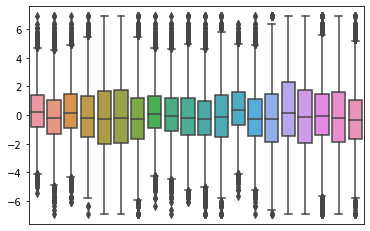

In [26]:
x = sns.boxplot(data=df0)
x.set(xticklabels=[])
x.tick_params(bottom=False)
x.set(xlabel=None)

In [13]:
ts_df = ts_df.sample(frac=1)
df1 = ts_df.iloc[0:20, 0:-1].T
df1

,6976,7028,6965,6967,7019,6955,7008,6988,7034,6947,6973,6981,7036,6977,6970,7018,6956,6998,6991,7002
HOTAIR,-0.100311,-0.587943,-0.245501,-0.395676,0.924277,-0.802974,1.012661,0.457955,-0.489709,0.554655,-0.656425,-0.764931,1.772836,0.395676,0.157994,0.100311,2.092799,0.260239,-1.565333,-0.621846
C9orf43,-0.275030,1.910335,-0.656425,0.245501,0.924277,1.481498,-0.967593,-0.587943,0.426624,1.565333,0.187008,-0.245501,1.406334,0.275030,2.092799,0.014308,0.395676,-0.334788,-0.489709,0.621846
INSC,-0.967593,-1.161037,-0.554655,-0.245501,1.161037,-0.187008,1.274802,0.365075,-1.406334,0.245501,2.092799,0.882511,-1.216096,-1.109059,1.660817,-0.457955,-0.042936,-0.426624,-0.129103,0.656425
CYP11B1,0.365075,1.161037,-0.129103,0.129103,0.014308,-0.245501,0.691747,-1.910335,0.842126,2.092799,-0.395676,-0.727887,1.012661,1.565333,0.395676,-0.100311,-2.379772,-2.092799,-0.426624,-0.042936
TGFA,-0.395676,1.565333,0.042936,0.764931,-0.042936,-0.489709,1.660817,-1.910335,1.772836,0.489709,0.587943,-1.216096,0.457955,0.882511,-1.660817,0.187008,1.406334,1.012661,-1.274802,-0.764931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASAP2,-0.157994,1.772836,-1.274802,-1.910335,-0.426624,-1.406334,1.660817,0.521927,0.924277,0.365075,1.406334,0.028619,-0.842126,0.304783,-0.924277,0.334788,2.092799,1.481498,-0.395676,-0.334788
WDTC1,1.565333,-0.802974,-0.621846,-0.426624,1.660817,-0.216169,0.304783,-0.157994,0.100311,-1.406334,0.334788,-0.395676,0.882511,0.187008,-0.071596,-2.092799,0.071596,-0.365075,-1.481498,0.042936
NOTCH2,1.161037,-0.727887,-0.304783,0.621846,1.012661,-1.274802,0.395676,-0.489709,-0.157994,-1.216096,0.842126,1.216096,-1.059719,-0.882511,-1.481498,-0.216169,-1.406334,-0.334788,-1.910335,-1.337887
MPP5,-0.426624,-0.842126,0.245501,2.092799,0.521927,-0.521927,-1.161037,0.129103,0.334788,-2.379772,-0.691747,1.216096,0.587943,-1.216096,-0.882511,-1.059719,0.426624,0.727887,1.161037,-0.727887


[Text(0.5, 0, '')]

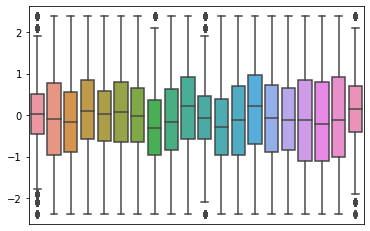

In [27]:
x = sns.boxplot(data=df1)
x.set(xticklabels=[])
x.tick_params(bottom=False)
x.set(xlabel=None)

In [30]:
dfConc = pd.concat([df0.T, df1.T]).T

In [31]:
dfConc

,TCGA-62-A46Y-01A-11R-A24H-07,TCGA-86-6562-01A-11R-1755-07,TCGA-97-A4LX-01A-11R-A24X-07,TCGA-44-2665-11A-01R-1758-07,TCGA-38-4628-01A-01R-1206-07,TCGA-78-7150-01A-21R-2039-07,TCGA-05-5715-01A-01R-1628-07,TCGA-55-8301-01A-11R-2287-07,TCGA-05-4384-01A-01R-1755-07,TCGA-J2-8194-01A-11R-2241-07,...,6973,6981,7036,6977,6970,7018,6956,6998,6991,7002
HOTAIR,0.128423,2.273136,-1.669273,-1.669273,2.024741,2.823806,5.092897,1.421263,0.241737,0.714129,...,-0.656425,-0.764931,1.772836,0.395676,0.157994,0.100311,2.092799,0.260239,-1.565333,-0.621846
C9orf43,2.662723,-0.921325,-0.324483,-1.312025,-4.347894,-2.273136,-4.404890,-0.107860,2.701821,-0.035942,...,0.187008,-0.245501,1.406334,0.275030,2.092799,0.014308,0.395676,-0.334788,-0.489709,0.621846
INSC,-3.662115,-1.980633,-0.746441,2.372999,-1.170567,-0.221101,2.721650,1.072874,0.628593,-0.757243,...,2.092799,0.882511,-1.216096,-1.109059,1.660817,-0.457955,-0.042936,-0.426624,-0.129103,0.656425
CYP11B1,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852,...,-0.395676,-0.727887,1.012661,1.565333,0.395676,-0.100311,-2.379772,-2.092799,-0.426624,-0.042936
TGFA,0.639237,3.440043,1.264374,-2.208757,2.273136,1.980633,2.099866,0.056484,-0.855203,-0.757243,...,0.587943,-1.216096,0.457955,0.882511,-1.660817,0.187008,1.406334,1.012661,-1.274802,-0.764931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASAP2,-1.662691,-2.662723,-1.495798,0.617961,-3.298276,5.325413,-1.810656,-1.649566,-1.089977,-1.336051,...,1.406334,0.028619,-0.842126,0.304783,-0.924277,0.334788,2.092799,1.481498,-0.395676,-0.334788
WDTC1,0.324483,0.221101,2.549581,3.142447,-0.314120,-4.240942,-0.910256,2.802955,2.161528,-2.009960,...,0.334788,-0.395676,0.882511,0.187008,-0.071596,-2.092799,0.071596,-0.365075,-1.481498,0.042936
NOTCH2,-0.397210,6.909418,0.345228,-0.407629,0.046213,-0.087305,1.078569,0.087305,0.714129,-0.293412,...,0.842126,1.216096,-1.059719,-0.882511,-1.481498,-0.216169,-1.406334,-0.334788,-1.910335,-1.337887
MPP5,-0.714129,3.325681,1.240741,-0.231417,4.992955,-0.283067,1.372352,-1.205521,0.438933,-0.159287,...,-0.691747,1.216096,0.587943,-1.216096,-0.882511,-1.059719,0.426624,0.727887,1.161037,-0.727887


[Text(0.5, 0, '')]

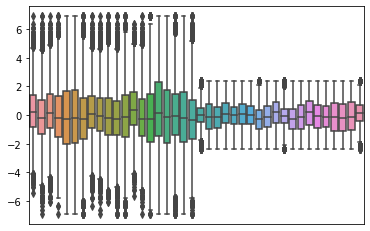

In [32]:
x = sns.boxplot(data=dfConc)
x.set(xticklabels=[])
x.tick_params(bottom=False)
x.set(xlabel=None)

In [41]:
ths = [1, 5, 10, 15, 20, 50, 100]

genes_rank = "/home/colombelli/Documents/experiments/Experiments20_ago/hyb_borda_borda/selection/agg_ranking_th1.csv"
train_df_path = "/home/colombelli/Documents/datasets/brca_rnaseq_genes_intersec.csv"

test_df1_path = "/home/colombelli/Documents/datasets/cumida/intersect_genes/GSE42568.csv"
test_df2_path = "/home/colombelli/Documents/datasets/cumida/intersect_genes/GSE22820.csv"
test_df3_path = "/home/colombelli/Documents/datasets/cumida/intersect_genes/GSE70947.csv"

In [45]:
tr_df, ts_df = load_dataframes(train_df_path, test_df1_path)
ts_df2, ts_df3 = load_dataframes(test_df2_path, test_df3_path)

In [46]:
tr_df = tr_df.sample(frac=1)
df0 = tr_df.iloc[0:20, 0:-1].T

ts_df = ts_df.sample(frac=1)
df1 = ts_df.iloc[0:20, 0:-1].T

ts_df2 = ts_df2.sample(frac=1)
df2 = ts_df2.iloc[0:20, 0:-1].T

ts_df3 = ts_df3.sample(frac=1)
df3 = ts_df3.iloc[0:20, 0:-1].T

[Text(0.5, 0, '')]

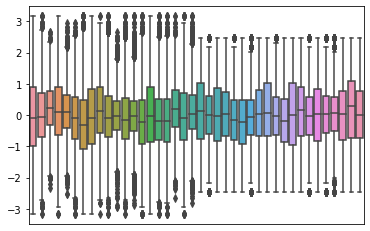

In [47]:
dfConc = pd.concat([df0.T, df1.T]).T
x = sns.boxplot(data=dfConc)
x.set(xticklabels=[])
x.tick_params(bottom=False)
x.set(xlabel=None)

In [48]:
df0 = tr_df.iloc[0:10, 0:-1].T
df1 = ts_df.iloc[0:10, 0:-1].T
df2 = ts_df2.iloc[0:10, 0:-1].T
df3 = ts_df3.iloc[0:10, 0:-1].T

[Text(0.5, 0, '')]

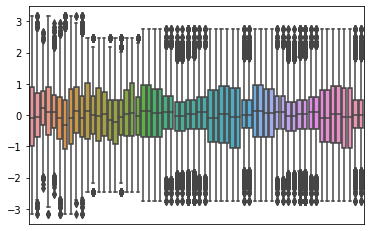

In [49]:
dfConc1 = pd.concat([df0.T, df1.T, df3.T, df3.T]).T
x = sns.boxplot(data=dfConc1)
x.set(xticklabels=[])
x.tick_params(bottom=False)
x.set(xlabel=None)